# Using ready-made models

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


You have to get access to implemented models

For example, VGG19

In [2]:
vgg19 = tf.keras.applications.VGG19()

574710816/574710816 [==============================] - 3s 0us/step


In [4]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [5]:
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2023-02-24 09:17:59--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2023-02-24 09:17:59--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.003s  

2023-02-24 09:17:59 (32.0 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2023-02-24 09:17:59--  https://5.imimg.com/data5/CB/DA/MY-

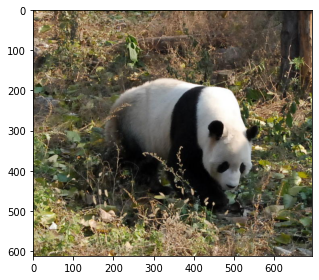

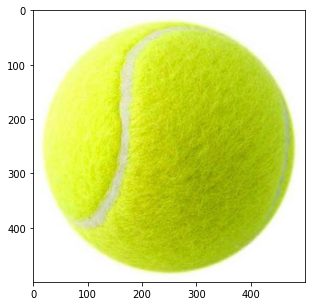

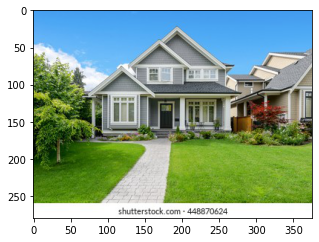

In [6]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")


In [32]:
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]


prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [8]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

1/1 [==============================] - 1s 1s/step


In [9]:
prediction

array([[1.26811750e-09, 3.44695439e-10, 3.22687157e-08, 5.80742965e-09,
        1.59081335e-08, 3.61620707e-08, 3.78847858e-07, 1.35859335e-09,
        2.15429221e-08, 6.56981580e-10, 1.51249513e-10, 1.48423185e-09,
        3.74348087e-11, 1.09397256e-08, 1.57303470e-09, 8.33321745e-11,
        1.26602574e-11, 1.62169425e-08, 5.11574356e-08, 1.30278281e-07,
        1.11702356e-10, 5.42670804e-11, 1.20431234e-10, 4.86386220e-09,
        5.09611242e-11, 1.74634075e-11, 6.35704683e-12, 1.71719756e-12,
        7.51463405e-11, 9.12551901e-09, 6.41465787e-12, 6.25388630e-11,
        1.00892489e-11, 4.55179672e-09, 1.04404610e-10, 5.48167726e-11,
        5.16542975e-10, 4.62333088e-11, 1.09567902e-11, 1.68759809e-12,
        2.47214783e-11, 1.18264740e-12, 2.68373404e-13, 3.49642754e-12,
        1.37552122e-12, 2.89462676e-10, 6.78024928e-11, 4.10797351e-12,
        9.53751855e-10, 3.84942668e-11, 4.19420297e-11, 8.46437498e-09,
        7.96193181e-11, 2.28020953e-11, 7.51536472e-11, 6.718203

In [10]:
prediction.sum(), prediction.shape

(0.9999998, (1, 1000))

In [11]:
from tensorflow.keras.applications.vgg19 import decode_predictions

input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.96405125),
  ('n02395406', 'hog', 0.0139677),
  ('n02134084', 'ice_bear', 0.007813165),
  ('n02120079', 'Arctic_fox', 0.0070520933),
  ('n02108915', 'French_bulldog', 0.0021671748)]]

In [12]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# add a preprocessing step and get an even more correct answer
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

1/1 [==============================] - 1s 679ms/step


[[('n02510455', 'giant_panda', 0.999424),
  ('n02445715', 'skunk', 0.00029818967),
  ('n02120079', 'Arctic_fox', 0.0001728217),
  ('n02395406', 'hog', 6.6973415e-05),
  ('n02114548', 'white_wolf', 8.604877e-06)]]

In [13]:
# let's make a convenient function out of it
def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")
    
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [14]:
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.
1/1 [==============================] - 1s 669ms/step


[[('n04409515', 'tennis_ball', 0.999806),
  ('n04039381', 'racket', 0.00012015946),
  ('n03445777', 'golf_ball', 3.1601798e-05),
  ('n03134739', 'croquet_ball', 8.094162e-06),
  ('n07749582', 'lemon', 7.5194757e-06)]]

А теперь попробуем другую сеть -- MobileNetV2

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet")

14536120/14536120 [==============================] - 0s 0us/step


In [16]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# that's wrong 

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.
1/1 [==============================] - 2s 2s/step


[[('n09229709', 'bubble', 0.058035698),
  ('n04418357', 'theater_curtain', 0.050058227),
  ('n04442312', 'toaster', 0.034434732),
  ('n03388043', 'fountain', 0.026835242),
  ('n03733281', 'maze', 0.026332017)]]

**We applied the preprocessing of one network to another. This led to incorrect predictions.** 

In [17]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0. Min: -1.0.
1/1 [==============================] - 0s 57ms/step


[[('n02510455', 'giant_panda', 0.9112968),
  ('n02133161', 'American_black_bear', 0.0016244837),
  ('n04254680', 'soccer_ball', 0.0012084878),
  ('n02134084', 'ice_bear', 0.0011731125),
  ('n02412080', 'ram', 0.0011307878)]]

## Task
Perform predictions using any two networks from tf.keras.applications for any images

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet

res_net50 = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [37]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a4/Ara_macao_-_two_at_Lowry_Park_Zoo.jpg -O Ara_macao_-_two_at_Lowry_Park_Zoo.jpg
!wget https://www.dogbreedslist.info/uploads/dog-pictures/norwich-terrier-1.jpg -O norwich_terrier.jpg
!wget data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgVFRYYGRgaHBoaGBocGBgaGRwaGBwaGRgaGBocIS4lHB4rIRgYJjgmKy8xNTU1HCQ7QDs0Py40NTEBDAwMEA8QHhISHjQrISs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAABBAMBAAAAAAAAAAAAAAADAAIEBQEGBwj/xAA9EAACAQIDBQUHAQgBBAMAAAABAgADEQQhMQUSQVFhBgcicYETMpGhscHw0RQjQlJicoLhsiSiwvEVNJL/xAAXAQEBAQEAAAAAAAAAAAAAAAAAAQID/8QAHxEBAQADAQEBAQADAAAAAAAAAAECETFBIVESA6Gx/9oADAMBAAIRAxEAPwDaKTG9jbT4R6vkSRYwu6DaYqOAM4a2fTbe+MyMjAvUhAL5wztlsj5/KEV84ioMdYekGyNhpx4x1PLKMTiBpwh1POAxbjzknduL5XgmqC4EyG4GUPAuJlGNhb4R9NbR4QQBlhqBnxmADmOekcNeULe2sCOgIsIV1jWfhMrmc4CcaHnMqeB9IW0a8ATXvpBDw2vJDNI7uoN2IC8yQIE/DUwMwNdZJUQdFgQCDcQ6iZWsiImICNdgOIhDWgascag5iCrvaFip2g9uE1La2QJM2jGPeaxtpxYjneFaFt3F20A3ePMGavjDdpebaIDaai/6ykxAzHlNRHRO7nGh1NInxDTP+HMzoq5LYzgGzcY9J1qIbMpB6Hoek7P2e2suIRXU56OvFT1+0tRc+z6fP/UzD7wik+G6qWrXGWv38/SYYk2uPwRyrb8+EaxINxpIbEVM+kfh7i4+EajXhVhNigxymCLRq63gSCnGYVibi0yjXj1gORL6wrJllGAZwyyh6DKZL52mLwZvfOAcrBhCcplH5kdIWFMRRMhM7x27MwEZhTeNY36Rr69eEBtRLmVG0dmLV3g7spv4d22SjgQRnfWXCvl1mk9sKONasnsN1adxdlsz/wBR3HG7l5yVYudjvUwzhGcPTJy5rfT0m3q2V5znE4bHBwKI9sl6a+P2SGxyqN4QpBFxYZiwOuU37E1dxLDW0L0DaG0N1SAc5RCjWc33t0eV/gJNp0z4qj6KLnpxkDE7TxKUnrrRUU6aM/jqbjMq5+FQptcabxHW0k+rrUXGGwmVmqFj1A+UFtDEMgs2Y/mH3E0mh3i0WqGm6mm6sVN2VkJBsbOuRHWbViahdLjiJakQHxFwTNe2w4OR5H5SzzGRlZjQD6TBWhbWo5qT1+crKyAG/SWW26niYX0P3lO9W4nSM0y03bsVtP2bI/8ADcJVHQk7j+l7TSi3GXPZKrer7Mnw1BueRPun42ijuXtDw3SOGZilDsrHt7JASbgWOfIkRR8NpwqX0ji0AjZXtaKqlx/uRElTHqZDwzHQySHHGASm5J6Rb2frGWN8rWjm10/9yAuZ85Ipk8ZF6Dzh6LjSAb2luB84dTIrvCq9llBKo48Im16WiTMZxu8OUKeOR0h6YygONteHL81hVNheUZLEHoYQyPmbcIQi5gIrrllBvpyhHGnKMKm3rIrI4DjDVcMrCxEDRbx58NJJr1QoBOlxfy5wsDw9FUNwPXWMxLgm0ficZTRbs1pUpi6bhnR1bPgwNvhI3Jtc4dDbzkPEYIkMtlYMCGGlwdQRoR0htjYoVEJ4qSt+dpYeyhm/LpqadkKDZPSQLe5UKtjxztrLoYJKaBEFlAsBytLAi0h46pYGDe2mbWqBahAmr7TxBCnOWG0cZeq2eU1PbmLJuoPCZhVBtWrc+ZlWryRi3uB5SHNxlILZGG2fUKurDUEEeYkEtD4Z85do6f7a+YYWPiGX83i+8zK/ZOLHsUva9rajgSOUzJqm260CeOcRe5ygd6wNjn/uGSnlaRDsMvi1hkHiMHRp2MLuXNwbc4B2Nhl+Xip55wW/Y2vDLUF+n3gETjlHK9hpnErRHK35+amEgii35nDgHdjUMKplVlHy0jqaCDqcBM7h15QqRuCYC6DQRi1DyOkehvnAJ7MazLJne9pkm0yIAg/ETO/lnHIlox1F4AHe2mt/lYQtU3GeQME62OXE/SRe06U/YM1UWCrcWJBBtqLceUldMJu6A2n2ZWtu7zXS4O6cx/uHTstSUWHhHHdAW/mQLyu2fsUvTRsPjKi7wG8N7esbZ5XBBvfWS6uCxVJd4Yrf8QWzoLHeIUaG4zPOT46WeS/6XeDw600CILKPy5PEyWlSae3apqTlK1O9m3C1Ngw3t3ePhaxGWc2LBYpaqLUpk7ji4urKfgwuJZY55Y/qXWqzVO0O0t1SAc5Px1Vy24uf6TU9towBvrJaSNQqV2Z2txgFwId7ubIAS7HQAZkmMrYgJcyw2bUR8NUdmBAcB052AKjqM/rIlaPtV1LsUFlJO75XNpAkraLgubaQOGpF2CjiflNIFDUoGFpSwq2pXsNPlFB03NhFIOv718h+dJIpcLwFJc4YG0OSQhhlMggnekqm8ocim5+UP7PKNWEEgYqG5zhqS85hFAhAYaFDR1J7yNv3zuRb5x9Nr6wJuseDI6VM7dbQ6mUOpjiYVRaBFQXtxjnHW3OFJmvytwN49GPGAtnYac/rMg5Hz+EKlXjGMapso+8w2bKDof8AX+4RJw9LLe4nSUO0dg18TV/elEoqDuqHJct/CSN2wA1tc6CbUoz8gAJi2pJy+0lm2scrjfjUqfZJ0zWsAeahlPlcNIL7Nr75RncG1gS5IIP8t5upK8z85ExtDfGRFxpf9dYdp/ltv3/jXdmdkk3w7+Irz6ddec212CrYekodm7asrJUG46Egi/I5HrlaOO1Va5vlDGdyyv1KyUM51M0PtRixY5y0232gRARvek5ntvarVn3VOXGSzaKPH4gsSeAlfQqkb1jYHX7Qu0nsdwcNfORAZYzSc3MNh3Zc1JHUR+z8IajhROh0OyYFLTO15LdF/HMoSnrM16e6xB4Ej4TFH3hKlTqVTIfpMQT3Bimvhqu1K8QqZ24cYwRFrcJlzPL55CSaTeHLIyMrcfKERjppAnUXvrDqZFRrDP5QlKtc2taAVatzYD1h2FxIKPZiLcZJp1L+cNHbw0zEeMrdIA3zBOf26Qitllrl8IVLS98/zlCJWBNpFpObwzEC0AivZj5w4e45yORofjHAEZiFEHD1vMhyD0tlMIg4cZMpYbKFiFiK1hfdJIGgt8rm0qaPaGkX3H3qdQZ7jixtf3lIurDyJtxtNleiLTU+1mwxVS6eF18SNyYD6HQiS2rJG40ajNnYbp0PQjI9eEkEcJV9mFcYWh7T39xS3S4vb0vb0lmWsCfWVi9UO3u02HwzqlVwhYErfIG2RF+eYkDA7epYtXNJ8lbdBBzJAuSPjOV96O0GrYkC37sbwRuDMDZrHjylHsDalfCOWpAEMLMrX3TyOWhHOTsd5JPjo3a3aCKj75KVl5Zb/wDKw5giaCdu4hhYNYdJB7RdoKuKdTUUIVFgBf5kx2AzAjxMspbqDJTqOfExMkY2mKNMnjL7Y+CyuZrvat95yg/h+pk3usNXdySSdTGSTjcI1MgNxAYesjTSNy7tKSPi91uKkr5gi/rY39DOy4/2dGiz1CFRRcn7dSeU88bG2q+GqrWp7u+um8CR6gES92l2gxWOstR7qo3iqruothrYanle/wBZLE9a9tCqGdmUWBJIHmb5wWG94RtTW0k7OwzOSy/wC58pSiViLnSKYqOLmKGnW6FfOxIvDsc73yEi00vqBCXtkxvpb7w4jA/OGvplB01FrQ4awgGw78DpCOwuJFV72ykiiwOozhpIdb2Pxjty/QxKY6A1DfXUaySlhIxuLkGJWJIPLjCpHtL3ELSzOYzgaSDjDoud4ElTHGBLRtOrb3ueUosMGnOWKCQcFpJ6GRaG4kDE075SwaRMRoZKsM2VtBKiLuHTwsuhVlFirDgZZVEDKVNiCOOnrONdpe0rYHHIVuVYD2yA57t/CV/qHz08uobC2slemrKwZWAKsNCDx6HpwMT7Cz8c/wC8nspWrFalMXWnwHvEcd1QLADl+HU9l7GVwA1wZ6BqICJqu0+z6g79NQDxXgf0MlmnTHLbknafsoUT2yXO77w6c5Q4AkC4naMQqOjU2ya2anX05icqxmEFHEGmcgTdeVjEviZfraeztXfQzXKOBNbFuLeENcnyyAlx2OHvr1Mvti4ECq5A5X8ySfvM26rM41DvF2Zu06NUDQlD/kN5f+LfGaBO195GHB2e7W91qZHqwX/yM4rN48GQZuVPatNNmqiKBWdmV242U3+Y3R6maZJ1NMgo4y9S9RmWbTstUoYWs7kb7gKq8c+nLOC7PbF9vWCAHdGtteg9Z0sdi2qlA4CUkzFPUsw0ZyMvTP7SWjkVPZ1dgCEax0yinfF2EgyAik3fw21dDnEynKxv+khriiGtaTUbrNOR4qnS0fTJ48dJgAZc48i8LsemkkIud5GpmGV4RKDQVKobkHSCWoGygvaZ+Um2oslcGOW0gK5OY+Eko2WcokILaSQhlctchrG0lhwIBFqhuHl6Rq1ra/CBZ925yA5xu/e7Gx/MoabHs33RJwlbspvAJYiFpMZDxD6nlJZmqdvdr/s2EqODZ2G4n9z5X9Bc+klXGOIdscb7fFVagNxvEA9Fy+xPrLPu77WnCVRTqN+5c6n+BzYb39p0PoeBvrVMbyNzvITpaJPEtet8Fig6ggw1RLzkvdJ2lLqcM7XemLoTq1MWFupU2HkRynWUNxKjW+0Gyg4uMmGhHynG+26sLFvfRsz0P4J6CrJOK961NUcgWuRn8Ra8xZrKOku8Vd2L2mgDhtdep8p0PZS7oucicz5zhezcWabq4F90gkc+k7XsbFrURXU3DAEfpGU+7ZlQu86uF2ey/wA9RFHoS/8A4Tik6B3q7Y36qYZT4aY3n/vcZA+S/wDIzn81ODIMm4epY39JBknCrfKVK7N3U7MXdarbMzpRWc+7sqrUkFFx4al3pPwP86HqNfjOhmIgG7FCbsUK47v2yJz+kPTrZZa9ZCqG/wCawyNYXOp68oclnRrXkk1LC+srcPWN8yPvJRq26wJNKsDlxh1eVi1PFkM9IZnJa18hygS1NjlE7X5wNR7CYpOcraQ1Bt/Pjlwv85IFbK8glja/H8vBYjGBLbx/U+UkE/2pJBhmqXYdJrGK2238ItyvmZU19r1G1c/T6TX81dt8xmKVbXdQOrASDU2zSS/jB0yFzpnNFesTmTeAerNfzDbumw6wekjjRgCPI5y3E1nsbUvhaR/oX5C02VTMNUieE4f3i7YOKrhEN6aFlS2jEWDv5EgqP7SeM6B2427uKcNTJ3mFqhU+IBh4aaHg78/4VucspR7B7GHdNavbea1kGSqoyCqOQFh6TGWX43jNTdcoaiabMrDkfjeV2JGc2rt9hwlcWyBt8pqmIOc1jdxnLrYu7ct/8lhty9y7A/2lG3/+259J6aRbCcP7jdn72JrV2XJKe4p4BnIJt13V/wC7rO4zTFBxJyM4R3lkEu3Evb4ZzuWNeymefO8LE3YLxLs3wyH1mb2NzjTFM3Hsx2mGHo1A2ZXNF/mJyt9z0mmCP184s2gmLxTVHao5uzEsx6n7QEREUqsx9GoVNxBxQO092e2kqUxQcAFTvIxyzv8AwngROoLpOI90OLUvUosAbWdb20OTD47vxnbaekaYOtFMxQrhiVeBFhzhd/gPP4yFStxMOrjKGKlq4vmLnnJAqbxyvYekr2q53maOMsLeecItKbG4tCuxBuP1lUdoAcYJ9sKOMaF02KN7fKPGNGlsuHn+XmqNtmxJHHrI9TbDEZS/y02zGbSCI7fy/UzXU2sSxJG9zPEeQlNicazAgkwGCxFjN4zQ2Nzck8OB/SQ6oF44MCLD0+8AzS1IGzWjHaZvBVJFdk7v6l8HT6Aj4Mwl3tvbC4dL3G+19wa/5Ech8zYTWe7ep/0adC//ADYwuD2a+KxDVqmVMGyLzAyH5+s45W8jrjJ6P2Y2KXb9pqi+ZKA6knV25k85tGITIiSKaBQAMgBYQdcRMdRLluuF96VGzqes0Osb2PP6zpPewlt09Zr3drsT9qxybwulL96/I7hG6vq1suQMuPDLrtHd7sH9kwdNCLOw36n972JB8hZf8ZtbGDpLMtrKyiY/3G8jPNPbGtvYl+Q0+JnpLbL2pueh+k8wbdfer1P7pPVnEFRePK2z0mKZsQbZS0bCqy3Gh05joecor2phhca8v0gCIV0KGSKYD6+FvkYJUGKTauDtIzUyOIMG1/2DxxpY2ieDEo3k2nzAno/DPcCeVMJVKOjjVGVv/wAkH7T0R2L2rUrITUXd0Kcyp0uLays3rbIpi8UDze+Kz8phscSPrKpqsa1UzWk2tKmNMEcY3OVxYnSSkwTnhbzjSbEOKJ4xhdjoDJeFwQGbZn5SSEAGkqKdnPIwTVDLOouZykSqJNtIbP1ipVLHKOqi8iFipl3okbFh8RcLYcDfzuI5i2tpW4LEAW8/9Sd7a/GUZLRjPGl4xmkHWO7Nr4a39Tj4mb5RAGQE553Yv/0/+bfWdCQzl66eJYgq2kepg6plRyXvbpfu78mEvu6DYfscJ7Zh46539Mwi5IP+Tf5Qna3Y37U9OhwZxvnkgN2t1t9Zu2CohFVFFlUBVA0AAsAJMSpg0gw2cy75QNNtZUVPamtu0H8j9J5mxrXqMf6jPQfb/FbuHfyM87ObknmTJOr4khhuyRg8QB4DofvK8NlETp5fQzSaSMZkSNeR/OMEtbKYapcZwRkNJK4o23WzHDgR5GMc30N/PWAmRC6ImehuwlQGgh5qv0nnm87j3dOfY0zvXG4PTK1vSWM10Xe6xQIMUDy4pubDPyk/DbNY5ud0cuMm4PBKmnx4yfbLKdJERsPhFXQep1hyI+0yKcrIVoypJLJBPxkohVM5FZJZEeUj1B0kaVtRJDrJcS1qSLUpyKrEciWFGqCJExFPjB06lol0WbWxeMZ5GSpMl5UdT7sKv7phyc/Y/edMpNlOQ92NbJx/UPmB+k6thXynO9bnE5XjKj2zMYXkJ6hdrDQazNqyCYWndy/PIeUtaYykSkgEkl7SyJTa7wStAYirnbnMu9llGid5+KtRYXnD51DvQxl13ec5eDJFOblMExM142VIcsd7MnMZwccGIgYImJkm8xAU653XY7eobl80Yr6aj6zkc2/u52gUxBS+Tj5r/on4SxnLjvVOpkIpCp1BYaRQON0v0hhp6zMU7+s3gn8Pr+kYsUUVDX0jWmIplIC/DzMA358oopn1tCqQNSKKT1UevpK9tTFFM3jU6JSh2iim5xit27t/ffzH0M65hNJiKcsu1vHgmL90+UHgPdEUUz6vizSJ5mKb8Sq2t70di/cPlFFMlcT7xPfE0iKKWcCEyYopTxiKKKAooooClr2Z/wDs0v7h94opZ1Lx3vDe4vkIoopUf//Z -O melliz.jpg

--2023-02-24 09:47:59--  https://upload.wikimedia.org/wikipedia/commons/a/a4/Ara_macao_-_two_at_Lowry_Park_Zoo.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1957869 (1.9M) [image/jpeg]
Saving to: ‘Ara_macao_-_two_at_Lowry_Park_Zoo.jpg’

Ara_macao_-_two_at_ 100%[===================>]   1.87M  3.35MB/s    in 0.6s    

2023-02-24 09:48:00 (3.35 MB/s) - ‘Ara_macao_-_two_at_Lowry_Park_Zoo.jpg’ saved [1957869/1957869]

--2023-02-24 09:48:00--  https://www.dogbreedslist.info/uploads/dog-pictures/norwich-terrier-1.jpg
Resolving www.dogbreedslist.info (www.dogbreedslist.info)... 66.147.252.246
Connecting to www.dogbreedslist.info (www.dogbreedslist.info)|66.147.252.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13229 (13K) [image/jpeg]
Saving to: ‘norwich_terrier.jpg’


Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.48120880126953.
1/1 [==============================] - 1s 1s/step


[[('n01818515', 'macaw', 0.99456644),
  ('n01820546', 'lorikeet', 0.0027039384),
  ('n02002556', 'white_stork', 0.00041283213),
  ('n02002724', 'black_stork', 0.00034070556),
  ('n02007558', 'flamingo', 0.0002943741)]]

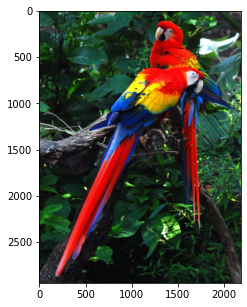

In [21]:
new_pic = read_and_show("Ara_macao_-_two_at_Lowry_Park_Zoo.jpg")

make_prediction(res_net50, preprocess_input_resnet, decode_predictions_resnet, new_pic)

In [28]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
from tensorflow.keras.applications.xception import decode_predictions as decode_predictions_xception

xception_model = Xception(weights='imagenet')

91884032/91884032 [==============================] - 1s 0us/step


Image shape: (1, 299, 299, 3). Max: 0.997115969657898. Min: -1.0.
1/1 [==============================] - 1s 1s/step


[[('n02094258', 'Norwich_terrier', 0.9203637),
  ('n02094114', 'Norfolk_terrier', 0.010723396),
  ('n02096294', 'Australian_terrier', 0.0019936378),
  ('n02096177', 'cairn', 0.0011532377),
  ('n02113023', 'Pembroke', 0.0010521399)]]

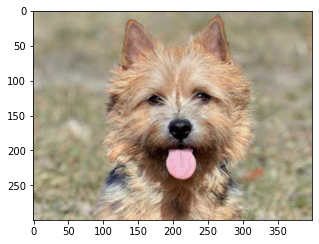

In [36]:
norwich = read_and_show('norwich_terrier.jpg')
make_prediction(xception_model, preprocess_input_xception, decode_predictions_xception, norwich)